※ 퍼셉트론과 신경망의 차이점?

1. 퍼셉트론? 원하는 결과를 출력하도록 사람이 직접 가중치를 정해줘야한다.

2. 신경망? 가중치 매개변수의 적절한 값을 기계가 데이터로부터 학습해서 자동으로 알아낸다.


■ 신경망 안에 들어가는 활성함수 3가지

    " 활성화 함수는 신호의 총합을 출력 신호로 변환하는 함수 "
    
    즉, 활성화 함수는 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할을 한다.
    
    
 1. 계단함수 : 0 또는 1의 값을 출력하는 함수
    
 2. 시그모이드 함수 : 0 ~ 1 사이의 실수를 출력하는 함수

 3. ReLu: 입력이 0이 넘으면 그 입력값을 그대로 출력하고 0 이하이면 0을 출력하는 함수

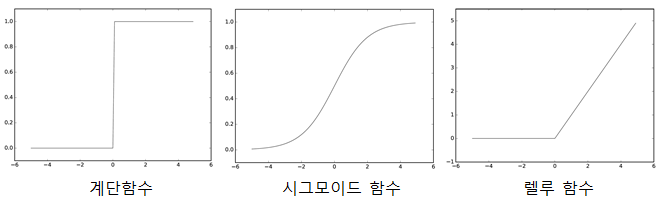

■ 계단함수

    퍼셉트론에서는 활성화 함수로 계단함수를 이용한다.

In [10]:
# 계단함수를 파이썬으로 구현하시오
import numpy as np
x_data = np.array([-1,0,1])

def step_function(x_data):
#     return [0 if x<=0 else 1 for x in x_data ]
#     y = x_data > 0  # np.array 형태
    return (x_data > 0).astype(np.int)  # bool type을 정수로 변환하기

print(step_function(x_data))

[0 0 1]


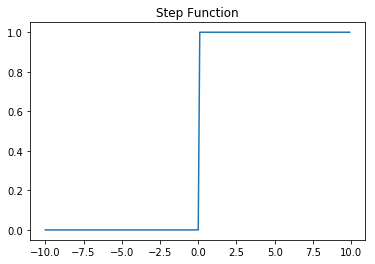

In [11]:
# 계단함수를 파이썬으로 구현하시오
import numpy as np
import matplotlib.pyplot as plt

x_data = np.arange(-10,10,0.1)

plt.plot(x_data,step_function(x_data))
plt.title("Step Function")
plt.show()

■ 시그모이드 함수

계단함수 ( 단층 퍼셉트론 ) vs 시그모이드 함수 ( 다층 퍼셉트론 )

※ 이 둘의 차이점과 공통점

    - 차이점? 계단함수는 숫자 1과 0만 출력하는데 시그모이드 함수는 0과 1사이의 실수를 출력한다.
        
        예: h(a) = 0.8834   (a: 가중치의 합, h(): 시그모이드 함수)
        
    - 공통점? 둘다 0과 1사이의 데이터만 출력한다는 것, 비선형 함수라는 것이 공통점이다. 확률이 결과로 출력된다.
    
<br/>


※ 시그모이드 함수식

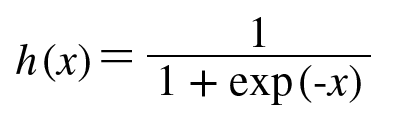


                                                                                                exp(-x):  e(자연상수)^(-x)

In [4]:
# 시그모이드 함수를 파이썬으로 구현하시오
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([1.0,2.0])
print(sigmoid(x))

[ 0.73105858  0.88079708]


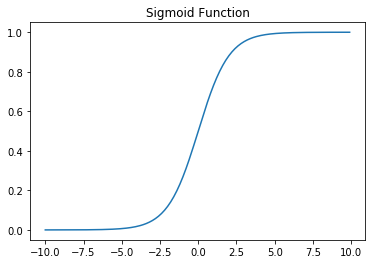

In [12]:
import matplotlib.pyplot as plt

x =  np.arange(-10,10,0.1)
plt.plot(x,sigmoid(x))
plt.title('Sigmoid Function')
plt.show()

※ sigmoid 함수식

통계학에서 성공할 확률이 실패할 확률보다 얼마나 큰지를 나타내는 오즈비율이라는 값이 있다.

오즈비율 = 성공 / 실패 = P  / (1 - P)

C:\Users\nsa18\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


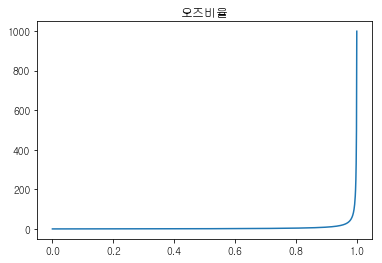

In [29]:
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/NGULIM.TTF").get_name()
rc('font', family=font_name)

p =  np.arange(0,1.001,0.001)

plt.plot(p,p/(1-p))
plt.title('오즈비율')
plt.show()

성공할 확률 P를 0에서 1사이의 값으로 나타내면 실패할 확률은 1 - P 이다.

위의 그래프에서 P (성공할 확률) 가 1에 가까워지면 오즈비율 값이 급격히 커지는 현상이 발생한다.

급격히 커져버리는 현상을 방지하기 위해서 이 함수에 로그를 취한게 logit 함수이다.

로그를 사용하는 이유: 큰 숫자를 작은 숫자로 표현하기 위해


C:\Users\nsa18\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\nsa18\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


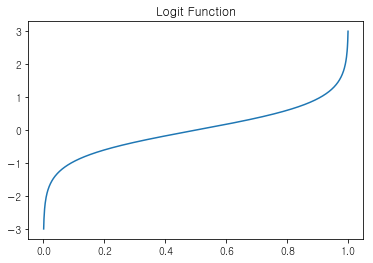

In [30]:
p =  np.arange(0,1.001,0.001)

plt.plot(p,np.log10(np.array(p/(1-p))))
plt.title('Logit Function')
plt.show()

P 가 0.5일때 실패할 확률 대비 성공할 확률이 0이 된다.

P가 0.5 일때는 0이 되고
P가 1 일때는 무한히 큰 양수
P가 0 일때는 무한히 큰 음수를 가지는 특징이 있다.

log(P / (1-P)) = wx + b

이 로짓 함수를 뉴런의 출력값에 따라 확률 P를 구하기 쉽도록 지수 함수 형태로 바꾸면,

P = 1 / (1 - e ^ (-(wx + b)))
  = 1 / (1 - e ^ (-x))   # x : 다중의 합 = wx + b


■ ReLU 함수( Rectified Linear Units)

Relu는 입력이 0 을 넘으면 그 입력을 그대로 출력하고 0 이하이면 0을 출력하는 함수

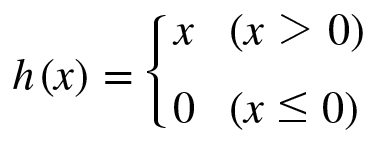


신경망 학습이 잘되는 편으로 현업에서 주로 사용

In [65]:
def relu(x):
    if x <= 0:
        return 0
    return x

print(relu(-2))
print(relu(0.3))

0
0.3


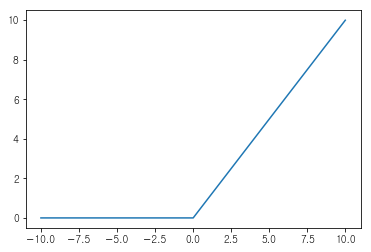

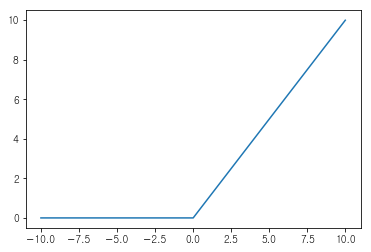

In [101]:
x =  np.arange(-10,10,0.01)

relu = np.vectorize(relu)
lam = lambda x : relu(x)
plt.plot(x,lam(x))
plt.show()

def relu(x):
    return np.maximum(0,x)  # maximum 은 두 입력 중 큰 값을 선택해 반환하는 함수이다.

plt.plot(x,relu(x))
plt.show()

■ 다차원 배열의 계산

numpy로 행렬만들고 차원수 확인 과 shape확인하는 방법

In [67]:
# 예:

import numpy as np
b = np.array([[1,2],[3,4],[5,6]])

print(b)
print(np.ndim(b))  # 2차원
print(b.shape)  # 3행 2열

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


■ 행렬의 내적

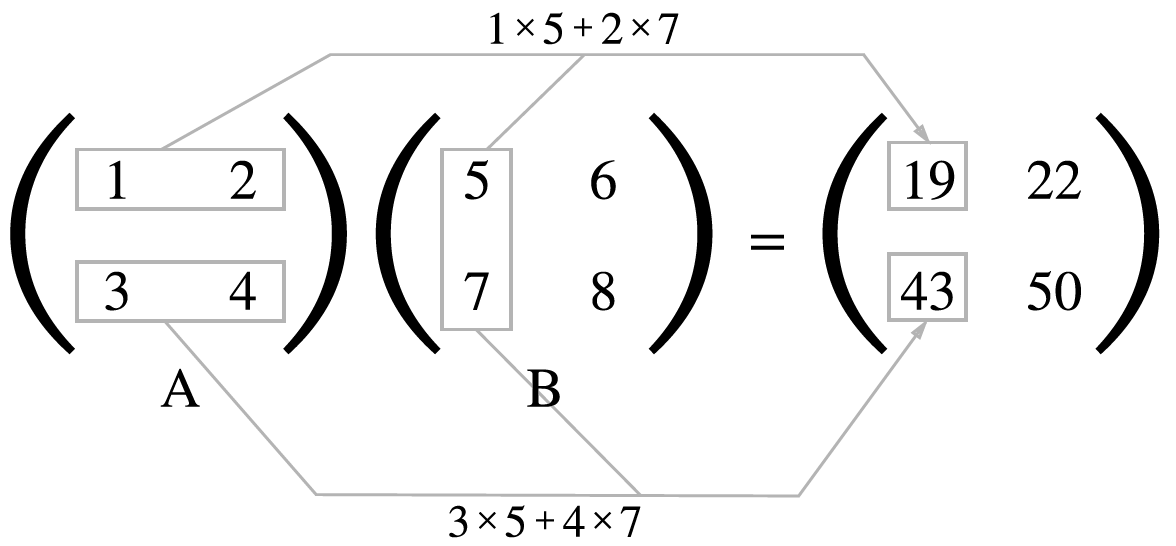
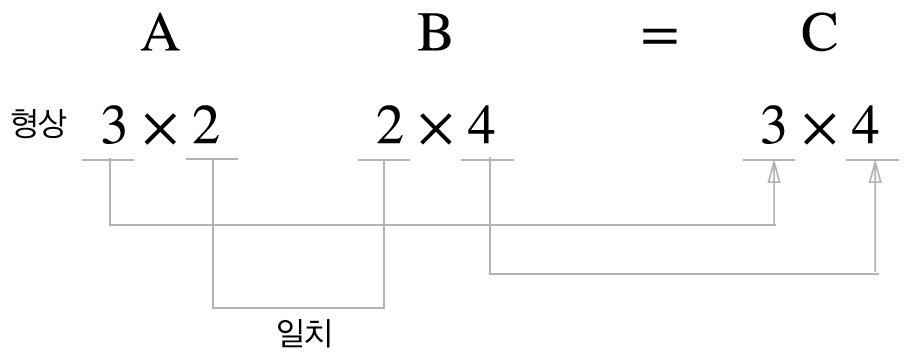

In [75]:
import numpy as np
a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])

print(a.dot(b))
print(np.dot(a,b))
print(np.matrix(a) * np.matrix(b))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


■ 신경망 내적

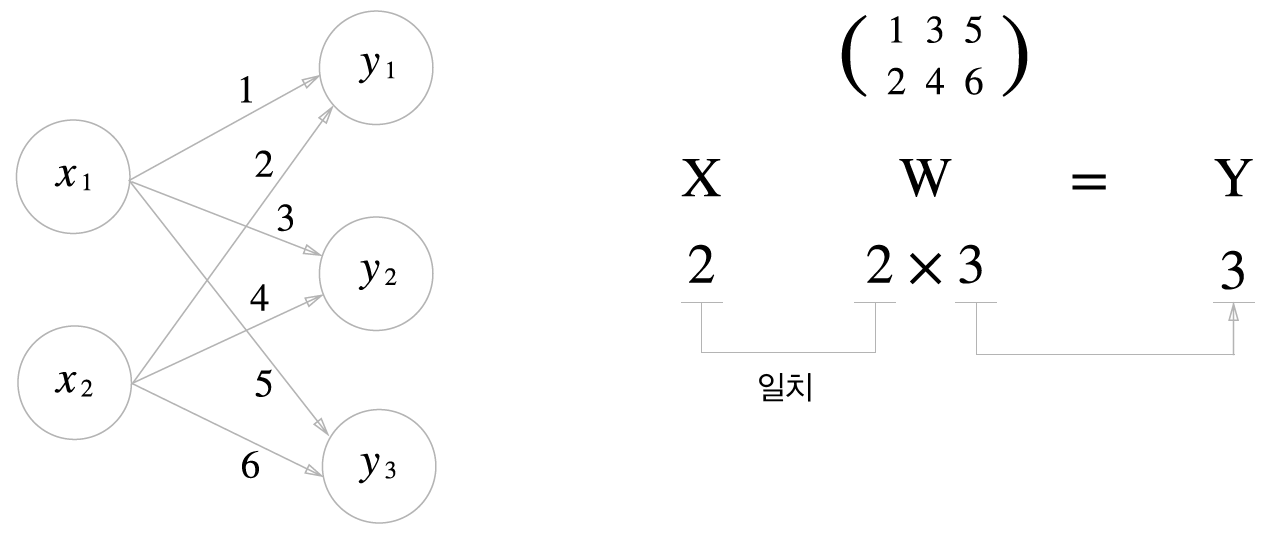

In [7]:
# 위의 신경망의 x1 과 x2 가 1과 2 이면, y1 과 y2, y3 의 값은 무엇인가?

# y1 = x1 * 1 + x2 * 2
# y2 = x1 * 3 + x2 * 4
# y3 = x1 * 5 + x2 * 6

x = np.matrix([1,2])
w = np.matrix([[1,3,5],[2,4,6]])

y = x * w

print(y)

x = np.array([1,2])
w = np.array([[1,3,5],[2,4,6]])

y = np.dot(x,w)
print(y)

[[ 5 11 17]]
[ 5 11 17]


In [5]:
# 위의 신경망에서 만들어진 가중치의 총합인 y의 값을 시그모이드 함수를 통과시켜 나온 y_hat을 출력하시오

y_hat = sigmoid(y)
print(y_hat)

[ 0.99987661  0.99999774  0.99999996]


■ 3층 신경망 구현하기

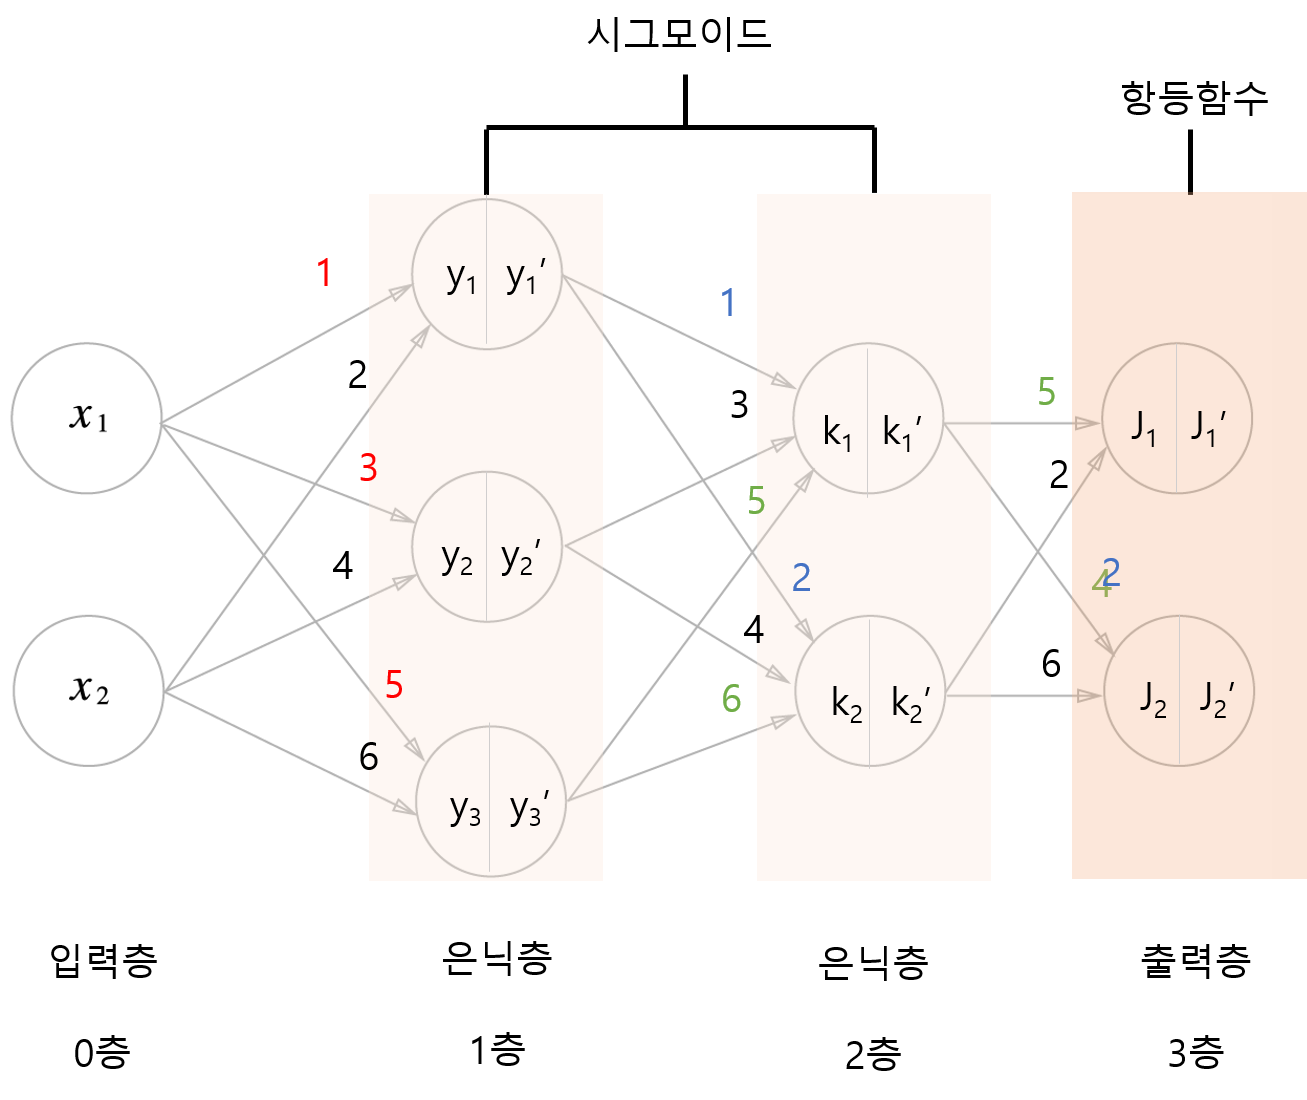

In [6]:
w2 = np.array([[1,2],[3,4],[5,6]])

k = np.dot(y_hat, w2)

print("k:",k)

k_hat = sigmoid(k)

print("k_hat:",k_hat)

w3 = np.array([[1,2],[3,4]])

j = np.dot(k_hat,w3)

print("j:", j)

k: [  8.99986962  11.99974392]
k_hat: [ 0.99987659  0.99999385]
j: [ 3.99985815  5.9997286 ]


■ 출력층 함수

    " 출력층의 함수는 그동안  흘러왔던 확률들의 숫자를 취합해서 결론을 내는 함수 "

신경망으로 구현하고자 하는 문제에 따라 출력층 함수가 다르다.

1. 회귀? 항등함수
    
    예 : 독립변수
        종속변수
        
2. 분류? 2클래스분류 : 시그모이드 / 다중클래스분류 : 소프트맥스 함수

    예 : 정상 폐사진 vs 폐결절사진

In [27]:
# 마지막 층 항등함수추가
# 입력값을 받아 그대로 출력하는 항등함수를 identity_function 이라는 이름으로 생성하시오!

# 신경망 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity(x):
    return x

# 3층 신경망 구축하기
# 1층
x = np.array([1,2])
w = np.array([[1,3,5],[4, 5, 6]])

y = np.dot(x,w)
# print(y)

# 1층 -> sigmoid
y_hat = sigmoid(y)
# print(y_hat)

# 2층
w2 = np.array([[1,2],[3,4],[5,6]])

k = np.dot(y_hat, w2)
# print("k:",k)

k_hat = sigmoid(k)
# print("k_hat:",k_hat)

# 3층
w3 = np.array([[1,2],[3,4]])

j = np.dot(k_hat,w3)
# print("j:", j)

j_hat = identity(j)

print("j_hat", j_hat)

j_hat [ 3.99985815  5.9997286 ]


In [26]:
import numpy as np

# 신경망 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity(x):
    return x

def init_network():
    network = {}
    network['W1'] = np.array([[1,3,5],[4, 5, 6]])
    network['W2'] = np.array([[1,2],[3,4],[5,6]])
    network['W3'] = np.array([[1,2],[3,4]])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    
    y = np.dot(x, W1)
    y_hat = sigmoid(y)
    k = np.dot(y_hat, W2)
    k_hat = sigmoid(k)
    j = np.dot(k_hat, W3)
    j_hat = identity(j)
    return j_hat

network = init_network()
x = np.array([1,2])
y = forward(network, x)
print(y)

[ 3.99985815  5.9997286 ]


In [3]:
# 입력값이 4, 5일때 위의 3층 신경망을 통과한 결과를 출력하시오

import numpy as np
from three_layers import *

network = init_network()
x = np.array([4,5])
y = forward(network, x)
print(y)

[ 3.99985817  5.99972863]


■ 신경망에 들어가는 함수

1. 은닉층에 들어가는 함수:

    - 계단함수
    - 시그모이드 함수
    - 렐루 함수
    
2. 출력층에 들어가는 함수:

    - 항등함수 : 회귀
    - 소프트 맥스 함수 : 분류
      (2클래스분류 : 시그모이드)

■ 소프트 맥스(softmax) 함수

    "다중분류를 위한 출력층 함수 -> 0과 1사이의 숫자를 출력하는 함수 -> 출력: 확률"

※ 공식

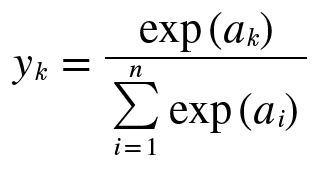

※ 문제!
소프트 맥스 함수는 지수함수를 사용하는데 이 지수함수라는 것이 쉽게 아주 큰 값을 내뱉는다.

e (무리수:자연상수):  e ^ 10 > 20000 , e ^ 1000 == inf(무한대)

In [7]:
import numpy as np

print(np.exp(1))
print(np.exp(10))
print(np.exp(1000))

2.71828182846
22026.4657948
inf


C:\Users\nsa18\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


* overflow(표현할 수 없는 너무 큰값) 해결하는 식!
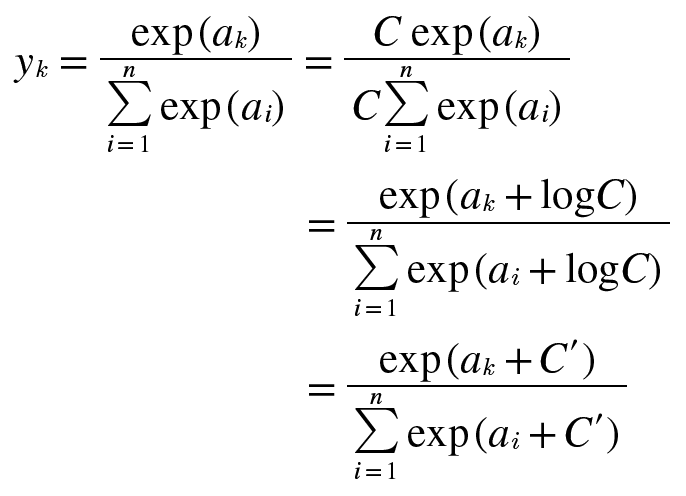

In [16]:
# 아래의 리스트를 자연상수의 제곱으로 계산한 값이 무엇인가?

import numpy as np

a = np.array([1010,1000,990])

print(np.exp(a))

# 가장 큰 max 값 출력하기

print(max(a))
print(a.max())
print(np.max(a))

[ inf  inf  inf]
1010
1010
1010


C:\Users\nsa18\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


In [20]:
# 아래의 리스트에서 각 요소의 아래의 리스트에서 가장 큰값으로 뺀값이 얼마인지, 자연상수 e의 제곱으로 해서 출력된 결과를 출력하시오
C = np.max(a)
print(a-C)
print(np.exp(a-C))

[  0 -10 -20]
[  1.00000000e+00   4.53999298e-05   2.06115362e-09]


In [22]:
def softmax(a):
    C = np.max(a)
    exp_a = np.exp(a-C)
    sum_a = np.sum(exp_a)
    
    return exp_a / sum_a

y = softmax(a)

print(y,sum(y),sep='\n')

[  9.99954600e-01   4.53978686e-05   2.06106005e-09]
1.0


In [1]:
import numpy as np

# 신경망 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(a):
    C = np.max(a)
    exp_a = np.exp(a-C)
    sum_a = np.sum(exp_a)
    
    return exp_a / sum_a

def init_network():
    network = {}
    network['W1'] = np.array([[1,3,5],[4, 5, 6]])
    network['W2'] = np.array([[1,2],[3,4],[5,6]])
    network['W3'] = np.array([[1,2],[3,4]])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    
    y = np.dot(x, W1)
    y_hat = sigmoid(y)
    k = np.dot(y_hat, W2)
    k_hat = sigmoid(k)
    j = np.dot(k_hat, W3)
    j_hat = softmax(j)
    return j_hat

network = init_network()
x = np.array([1,2])
y = forward(network, x)
print(y)

[ 0.11921653  0.88078347]


소프트맥스 함수는 분류를 하기 위해 확률을 출력하는 함수이다.

학습 --> 소프트맥스 함수 사용
테스트 --> 소프트맥스 함수 사용 X

자원의 낭비를 막기위해!

■ 출력층의 뉴런수 구하기

1. 이 사진이 고양이와 개만 분류 -> 2개
2. 이 사진이 정상폐사진 질병이 있는 폐사진 분류 -> 2개
3. mnist 데이터 10개

■ mnist 손글씨 필기체 데이터를 파이썬으로 로드하는 방법

1. 책 소스와 데이터를 다운받는다.
    /hands-on/datasets/MNIST/
    
2. 아래의 파이썬 코드를 실행해서 필기체 데이터 하나를 시각화한다.


In [10]:
# import sys, os
# sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)

img = img.reshape(28, 28)

img_show(img)

5
(784,)


[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
60000
5
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 

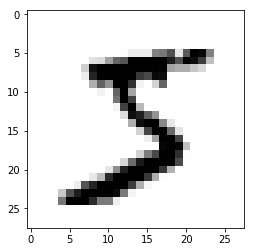

In [37]:
# x train 데이터와 lable 확인하기

# import sys, os
# sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
import matplotlib.pyplot as plt

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train)
print(len(x_train))

# 제일 첫번째 이미지 하나 출력
print(t_train[0])
print(x_train[0])

x_train_0 =x_train[0].reshape(28, 28)  # == 'flatten=False'

plt.imshow(x_train_0,cmap = matplotlib.cm.binary, interpolation="nearest")

plt.show()

In [23]:
# 아래의 list를 numpy array list로 변경하시오
import numpy as np

x = [[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.1,0.0,0.0],

     [0.1,0.05,0.2,0.0,0.05,0.1,0.0,0.6,0.0,0.0],

     [0.0,0.05,0.3,0.0,0.05,0.1,0.0,0.6,0.0,0.0],

     [0.0,0.05,0.4,0.0,0.05,0.0,0.0,0.5,0.0,0.0],

     [0.0,0.05,0.5,0.0,0.05,0.0,0.0,0.4,0.0,0.0],

     [0.0,0.05,0.6,0.0,0.05,0.0,0.0,0.3,0.0,0.0],

     [0.0,0.05,0.7,0.0,0.05,0.0,0.0,0.2,0.0,0.0],

     [0.0,0.1,0.8,0.0,0.1,0.0,0.0,0.2,0.0,0.0],

     [0.0,0.05,0.9,0.0,0.05,0.0,0.0,0.0,0.0,0.0]]

print(np.array(x))

[[ 0.1   0.05  0.1   0.    0.05  0.1   0.    0.1   0.    0.  ]
 [ 0.1   0.05  0.2   0.    0.05  0.1   0.    0.6   0.    0.  ]
 [ 0.    0.05  0.3   0.    0.05  0.1   0.    0.6   0.    0.  ]
 [ 0.    0.05  0.4   0.    0.05  0.    0.    0.5   0.    0.  ]
 [ 0.    0.05  0.5   0.    0.05  0.    0.    0.4   0.    0.  ]
 [ 0.    0.05  0.6   0.    0.05  0.    0.    0.3   0.    0.  ]
 [ 0.    0.05  0.7   0.    0.05  0.    0.    0.2   0.    0.  ]
 [ 0.    0.1   0.8   0.    0.1   0.    0.    0.2   0.    0.  ]
 [ 0.    0.05  0.9   0.    0.05  0.    0.    0.    0.    0.  ]]


In [28]:
# 아래의 numpy array 리스트의 차원을 확인하시오

x_ = np.array(x)

# print(x_.shape)
x_.ndim  # 그냥 dim 아니고 ndim으로 차원을 확인한다!

(9, 10)


2

In [32]:
# 신경망을 만들 때는 1차원으로 입력하여야 한다.

x = x_.flatten()  # numpy array 1차원으로 펼치기
print(x)
x.ndim

[ 0.1   0.05  0.1   0.    0.05  0.1   0.    0.1   0.    0.    0.1   0.05
  0.2   0.    0.05  0.1   0.    0.6   0.    0.    0.    0.05  0.3   0.
  0.05  0.1   0.    0.6   0.    0.    0.    0.05  0.4   0.    0.05  0.    0.
  0.5   0.    0.    0.    0.05  0.5   0.    0.05  0.    0.    0.4   0.    0.
  0.    0.05  0.6   0.    0.05  0.    0.    0.3   0.    0.    0.    0.05
  0.7   0.    0.05  0.    0.    0.2   0.    0.    0.    0.1   0.8   0.    0.1
  0.    0.    0.2   0.    0.    0.    0.05  0.9   0.    0.05  0.    0.    0.
  0.    0.  ]


1

In [41]:
# mnist 훈련데이터 x_train의 차원?
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
print(x_train.ndim)

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False, normalize=False)
print(x_train.ndim)

x_train.shape  # (60000, 1:흑백(3:color), 28(가로), 28(세로))

2
4


(60000, 1, 28, 28)

In [45]:
# label: one-hot encoding
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False, normalize=False, one_hot_label = False)

print(t_train[0])

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False, normalize=False, one_hot_label = True)

print(t_train[0])

5
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [50]:
# mnist 데이터를 가져오는 코드를 가지고 아래의 get_data() 함수를 생성하고 아래와 같이 실행되게 하시오

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
    return x_test, t_test

x_test, t_test = get_data()
print(x_test.ndim)
print(x_test.shape)
print(len(x_test))

2
(10000, 784)
10000


■ 신경망 구성하기

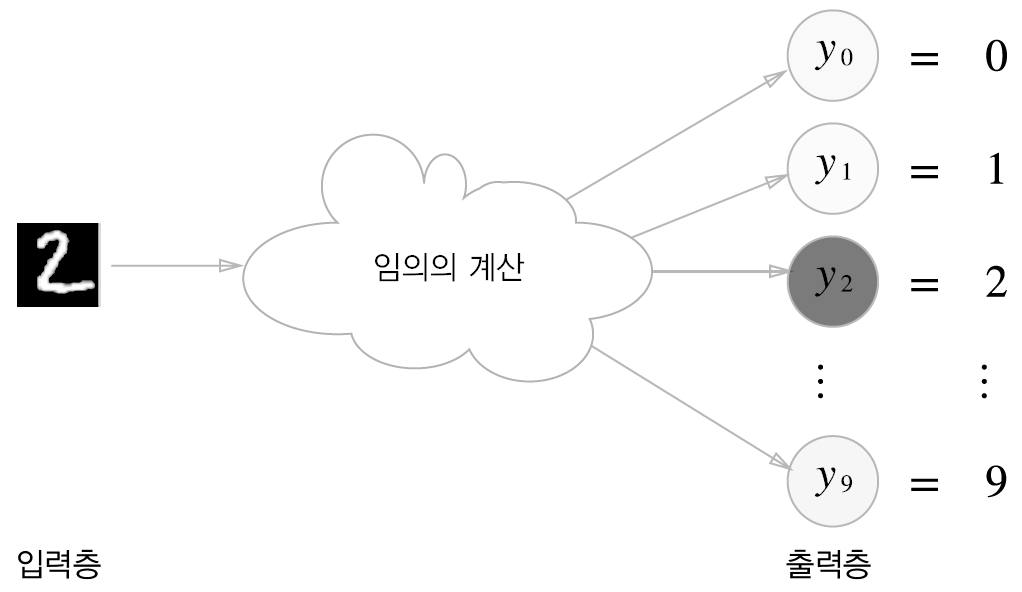

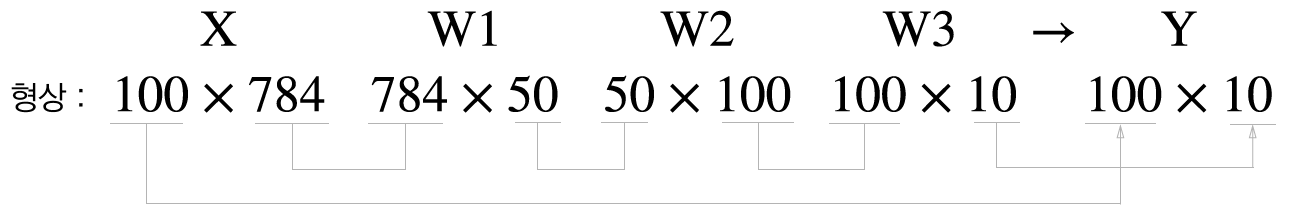



In [54]:
# mnist 필기체 데이터를 위해 신경망에서 사용할 가중치와 bias가 셋팅되어있는 sample_weight.pkl 을 로드하는 init_network 함수를 생성하시오
import pickle

def init_network():
    with open("sample_weight.pkl","rb") as f:
        network = pickle.load(f)
    return network

# print(init_network())
print(init_network()['W1'].shape)
print(init_network()['W2'].shape)
print(init_network()['W3'].shape)
print(init_network()['b1'].shape)
print(init_network()['b2'].shape)
print(init_network()['b3'].shape)

(784, 50)
(50, 100)
(100, 10)
(50,)
(100,)
(10,)


In [111]:
# Mnist 데이터 셋에서 숫자 하나를 입력하면 그 숫자가 어떤 숫자인지 예측하는 predict라는 함수를 만드시오

# 신경망 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(a):
    C = np.max(a)
    exp_a = np.exp(a-C)
    sum_a = np.sum(exp_a)
    
    return exp_a / sum_a

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
    return x_test, t_test

def init_network():
    # deeplearning from scratch에서 제공하는 Weight & bias
    with open("sample_weight.pkl","rb") as f:
        network = pickle.load(f)
    return network

def predict(network,x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = softmax(a3)
    
    return y

x, t = get_data()
network = init_network()
y = predict(network,x[0])
print(t[0])
print(y)
y1 = predict(network,x[1])
print(t[1])
print(y1)

print(x[0].shape)

7
[  4.28790463e-06   4.57293140e-07   1.84862816e-04   8.36050240e-05
   1.50847029e-07   6.31823241e-07   4.57820448e-10   9.99194682e-01
   3.80669348e-07   5.30830468e-04]
2
[  3.60331585e-04   1.14616717e-03   9.85867202e-01   6.45843707e-03
   9.29931829e-08   7.39182113e-04   5.14191855e-03   2.66473762e-07
   2.86270311e-04   4.13330392e-09]
(784,)


C:\Users\nsa18\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


(28, 28, 3)
[[[212 215 219]
  [209 214 217]
  [208 213 216]
  ..., 
  [213 217 218]
  [212 216 217]
  [214 218 219]]

 [[212 215 219]
  [214 218 219]
  [212 215 219]
  ..., 
  [211 215 216]
  [213 217 218]
  [214 218 219]]

 [[207 211 212]
  [210 214 215]
  [208 212 213]
  ..., 
  [213 217 218]
  [213 217 218]
  [215 219 220]]

 ..., 
 [[205 209 210]
  [209 213 214]
  [211 215 216]
  ..., 
  [210 212 212]
  [212 214 214]
  [210 212 213]]

 [[205 209 210]
  [205 209 210]
  [205 207 208]
  ..., 
  [212 214 215]
  [209 211 212]
  [209 211 212]]

 [[203 207 208]
  [202 206 207]
  [200 204 205]
  ..., 
  [207 209 210]
  [208 210 211]
  [208 210 211]]]


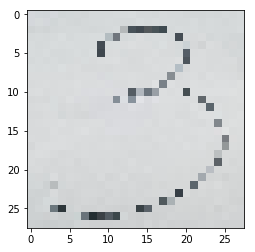

[[212 215 219]
 [209 214 217]
 [208 213 216]
 ..., 
 [207 209 210]
 [208 210 211]
 [208 210 211]]


In [149]:
# 1. 필기체 사진찍기 2. numpy 배열로 변환 3. 신경망에 넣고 예측하는지 확인하시오
# import PIL.Image as pilimg
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

im = cv2.resize(cv2.imread('./img/number.jpg'),(28,28), interpolation=cv2.IMREAD_GRAYSCALE)
print(im.shape)

pix = np.array(im)
print(pix)
plt.imshow(pix,cmap = matplotlib.cm.binary, interpolation="nearest")
plt.show()

pix = pix.reshape(-1, pix.shape[-1])
print(pix)
# pix.reshape(28, 28) #ValueError: cannot reshape array of size 10030815 into shape (28,28)

# network = init_network()
# y = predict(network,pix)
# print(t[0])
# print(y)
